As readmissões hospitalares (quando um paciente recebe alta mas é internado
novamente pouco tempo depois) são caras e refletem as inadequações no sistema de saúde.

Nos Estados Unidos sozinho, o tratamento de pacientes diabéticos readmitidos excede
300 milhões de dólares por ano. Identificação precoce de pacientes que enfrentam um alto risco
de readmissão pode permitir que os profissionais de saúde conduzam investigações adicionais e
possivelmente impeçam futuras readmissões. Isso não apenas melhora a qualidade do
atendimento, mas também reduz as despesas médicas em readmissão.
Diabetes é a sétima principal causa de morte (dados de 2016, fonte ao final do texto) no
mundo e afeta cerca de 23,6 milhões de pessoas só nos EUA e milhões de pessoas são
diagnosticadas com diabetes a cada ano em todo mundo.

Segundo a Associação Americana de Diabetes, o custo do atendimento a pacientes
diabéticos e pré-diabéticos nos Estados Unidos é o maior do mundo. Essa epidemia global afeta
mais de 350 milhões de pessoas, com 3 milhões de pessoas morrendo a cada ano devido a
complicações relacionadas ao diabetes, predominantemente cardiovasculares ou nefropáticas.
A readmissão hospitalar é uma das principais preocupações no tratamento do diabetes,
com milhões de dólares sendo gastos no tratamento de pacientes diabéticos que precisam ser
readmitidos em um hospital após receberem alta.

A necessidade de readmissão indica que cuidados inadequados foram fornecidos ao
paciente no momento da primeira admissão. A taxa de readmissão se tornou uma métrica
importante para medir a qualidade geral de um hospital.

Como analista de dados principal da organização (hospital, clínica ou operadora de plano
de saúde), seu trabalho é identificar os pacientes diabéticos de alto risco por meio de
estratificação de risco de registros médicos eletrônicos. Usaremos registros eletrônicos de dados
médicos, como resultados dos exames, nível de insulina, diagnóstico de outras doenças, etc...

Será necessário um extenso trabalho de engenharia de atrobutos e várias técnicas serão
demonstradas durante as aulas. Vamos justificar todas as nossas escolhas durante o
desenvolvimento do projeto e entregar o resultado da nossa análise através de diversos gráficos.


Os EUA mantém um programa constante de redução de readmissão de pacientes:
Hospital Readmissions Reduction Program (HRRP)
https://www.cms.gov/Medicare/Quality-Initiatives-Patient-Assessment-Instruments/Value-Based-Programs/HRRP/Hospital-Readmission-Reduction-Program


Outras Referências:


The top 10 causes of death
https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death

Associação Americana de Diabetes
https://www.diabetes.org/

---

Usaremos o conjunto de dados, "Diabetes 130-US hospitals for years 1999-2008", que foi
baixado do UCI Machine Learning Repository (e será fornecido a você com os demais arquivos do
projeto):

http://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

Os dados representam 10 anos (1999-2008) de atendimento clínico em 130 hospitais dos
EUA e redes de distribuição integradas com 100.000 observações e 50 recursos (variáveis) que
representam os registros eletrônicos com resultados de exames dos pacientes e dados sobre
cada hospital. A coleta dos dados foi descrita pelos autores conforme abaixo:
O controle da hiperglicemia em pacientes hospitalizados tem uma influência significativa
no resultado, tanto em termos de morbidade quanto de mortalidade. No entanto, existem
poucas avaliações nacionais sobre o tratamento do diabetes durante a hospitalização que podem
servir de base para a mudança.

Essa análise de um grande banco de dados clínicos (74 milhões de encontros únicos
correspondentes a 17 milhões de pacientes únicos) foi realizada para fornecer essa avaliação e
encontrar orientações futuras que possam levar a melhorias na segurança do paciente. Quase
70.000 encontros de pacientes internados com diabetes foram identificados com detalhes
suficientes para análise. A regressão logística multivariável foi usada para ajustar a relação entre
a medida da HbA1c e a readmissão precoce, enquanto o controle de covariáveis, como dados
demográficos, gravidade e tipo da doença, e tipo de admissão.

Os resultados mostram que a medição da HbA1c foi realizada com pouca frequência
(18,4%) no ambiente hospitalar. O modelo estatístico sugere que a relação entre a probabilidade
de readmissão e a medição da HbA1c depende do diagnóstico primário. Os dados sugerem ainda
que a maior atenção ao diabetes refletida na determinação da HbA1c pode melhorar os
resultados dos pacientes e reduzir o custo dos cuidados hospitalares.

HbA1c é uma medida de quão bem o seu açúcar no sangue está controlado durante um
período de cerca de 3 meses. Essencialmente, dá uma boa ideia de quão altos ou baixos, em
média, foram os níveis de glicose no sangue.


Descrição completa do trabalho de coleta dos dados:


Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical
Database Patient Records

https://www.hindawi.com/journals/bmri/2014/781670

In [ ]:
# Imports
# Manipulação dos dados/planilhas
import numpy as np
import pandas as pd
# Visualização dos dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('diabetic_data.csv')

In [ ]:
dados.shape

(101766, 50)

In [ ]:
pd.set_option("display.max_columns", 97)

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Limpeza e Transformação dos Dados

In [ ]:
dados.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [ ]:
dados.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
# Verificando valores únicos
for col in list(dados.columns):

    # Obtém uma lista de valores únicos
    list_of_unique_values = dados[col].unique()

    # Se o número de valores exclusivos for menor que 15, imprima os valores.
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

In [ ]:
# Vamos verificar a quantidade e percentual de registros onde o valor é igual a '?'
for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', dados[col][dados[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100, 2), '% do total')



Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 % do total


**Agora a parte importante - decidir o que fazer!**

- Falta os dados sobre peso do paciente em mais de 96% dos registros.

- O código do pagador e a especialidade médica também apresentam valores ausentes de 40 a 50%.

- As demais variáveis apresentam um baixo percentual de valores ausentes.


**Decisão:**

- 1- Devido à fraca interpretabilidade dos valores ausentes da variável peso, o melhor é simplesmente ignorar a variável e removê-la.

- 2- Vamos descartar as variáveis payer_code e medical_specialty, pois seria difícil tratar quantidade muito grande de valores ausentes.

- 3- Vamos remover os registros com "?" das demais variáveis.

- 4- Para a variável gender vamos remover os 3 registros com categoria "Unknown/Invalid".

In [ ]:
# Removendo as 3 colunas com alto percentual de valores ausentes
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [ ]:
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [ ]:
dados.isin(['?']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [ ]:
dados.shape

(98052, 47)

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [ ]:
# Verificando se há alguma variavel onde todos os dados tem o mesmo valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


In [ ]:
# Removendo as variavies com valores unicos
dados = dados.loc[:, dados.nunique() != 1]

In [ ]:
dados.shape

(98052, 44)

### Engenharia de Atributos

### Ajustando a Variável Alvo Para Estratificação de Risco

Uma readmissão hospitalar ocorre quando um paciente que recebe alta do hospital é readmitido novamente dentro de um certo período de tempo. As taxas de readmissão hospitalar para certas condições agora são consideradas um indicador da qualidade do hospital e também afetam negativamente o custo médico.




---

Nossa variável alvo é 'readmiited'. Queremos saber se um paciente será readmitido no hospital ou não.

A variável possui os valores:

-- < 30 (readmissão em menos de 30 dias)

-- > 30 (readmissão em mais de 30 dias)

-- No   (sem readmissão)

Nós podemos combinar a readmissão antes de 30 dias e após 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissão em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificação binária.

In [ ]:
dados['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [ ]:
# Primeiro, vamos criar uma cópia do dataset até aqui
dados_clean1 = dados

# Se precisar voltar a este ponto, apenas execute:
# dados = dados_clean1

# Assim não terá que executar todo jupyter notebook até aqui

In [ ]:
# Ajustando a variável alvo

# '0' significa que não foi readmitido
# '1' significa que foi readmitido, não importa quantos dias após a alta

dados['readmitted'] = dados['readmitted'].replace('>30', 1)
dados['readmitted'] = dados['readmitted'].replace('<30', 1)
dados['readmitted'] = dados['readmitted'].replace('NO', 0)

In [ ]:
dados.readmitted.unique()

array([1, 0])

In [ ]:
dados['readmitted'].dtype

dtype('int64')

In [ ]:
round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

0    53.0
1    47.0
Name: readmitted, dtype: float64

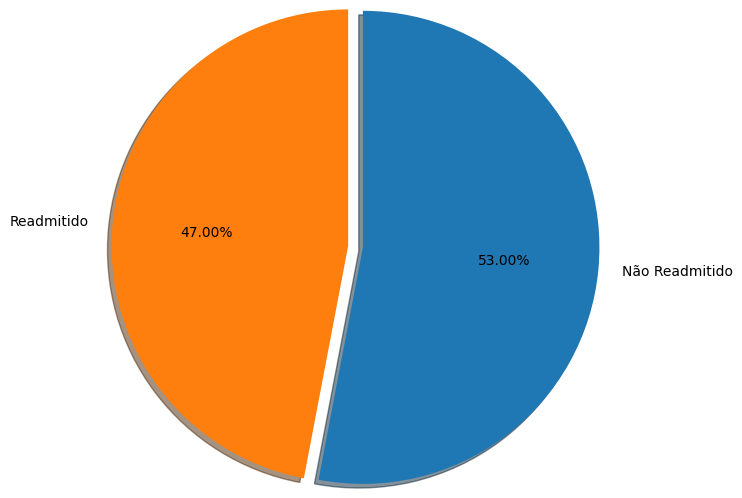

In [ ]:
# Percentual de cada valor da variável alvo
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

# Labels
labels = ['Não Readmitido', 'Readmitido']

# Plot
plt.axis("equal")
plt.pie(percentual ,
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

### Recategorização de Variável

Como tratamos a variável idade?

In [ ]:
dados.age.dtype

dtype('O')

In [ ]:
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

In [ ]:
dados.age.value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

Text(0, 0.5, 'Count')

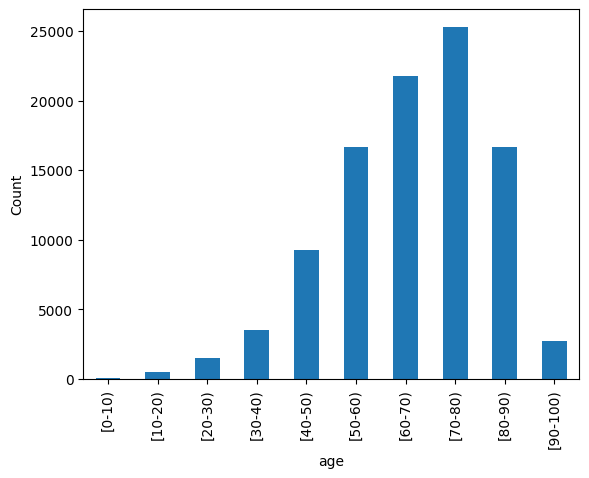

In [ ]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

Podemos perceber que a maioria dos pacientes está na faixa entre 50 e 90 anos.

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente.

Podemos adotar duas abordagens:

- 1- Se queremos ver o efeito do aumento da idade na readmissão do paciente, mesmo que de maneira grosseira, podemos assumir que a idade do paciente, em média, esteja no ponto médio da categoria de idade. Por exemplo, se a categoria de idade do paciente é de 20 a 30 anos, assumimos a idade = 25 anos. Então, convertemos categorias de idade em pontos médios, resultando em uma variável numérica.


- 2- Podemos recategorizar a variável, distribuindo os pacientes por um número menor de faixas e manter a variável como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade.

In [ ]:
# Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

# Classificamos como faixa de 0-50 pacientes de até 50 anos
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val
                          for val in dados['age']], index = dados.index)

# Acima de 80 anos ficam na faixa de 80-100
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val
                          for val in dados['age']], index = dados.index)

# As outras faixas são mantidas

In [ ]:
# Tipo ds variável
dados.age.dtype

dtype('O')

Text(0, 0.5, 'Count')

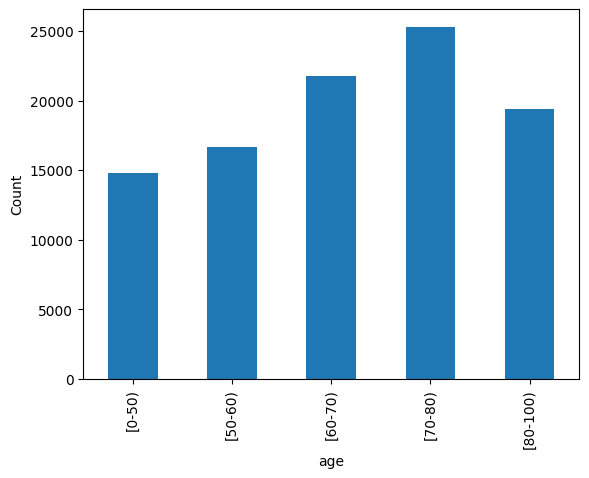

In [ ]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

Como tratamos variáveis do tipo ID? Seguiremos com a Recategorização de Variável.

Uma análise mais detalhada do arquivo IDs_mapping.csv revelará que 'admission_type_id', 'harge_disposition_id' e 'admission_source_id' têm valores com significado semelhante. Eles podem ser mesclados para ter menos valores.

In [ ]:
# Visualiza
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1


In [ ]:
dados.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7])

In [ ]:
dados.admission_type_id.nunique()

8

In [ ]:
# A variável 'admission_type_id' contém 8 níveis
# Reduziremos os níveis de 'admission_type_id' para duas categorias
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro'
                                        for val in dados['admission_type_id']], index = dados.index)

In [ ]:
dados.admission_type_id.nunique()

2

In [ ]:
dados.admission_type_id.value_counts()

Emergencia    52178
Outro         45874
Name: admission_type_id, dtype: int64

In [ ]:
dados.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [ ]:
dados.discharge_disposition_id.nunique()

26

In [ ]:
# A variável 'discharge_disposition_id' contém 26 níveis
# Reduziremos os níveis de 'discharge_disposition_id' para duas categorias
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro'
                                              for val in dados['discharge_disposition_id']], index = dados.index)

In [ ]:
dados.discharge_disposition_id.value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

In [ ]:
dados.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [ ]:
dados.admission_source_id.nunique()

17

In [ ]:
# A variável 'admission_source_id' contém 17 níveis
# # Reduziremos os níveis de 'admission_source_id' para três categorias
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro'
                                              for val in dados['admission_source_id']], index = dados.index)


In [ ]:
dados.admission_source_id.value_counts()

Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: admission_source_id, dtype: int64

O conjunto de dados contém até três diagnósticos para um determinado paciente (primário, secundário e adicional).

No entanto, cada um deles tem códigos ICD-9 exclusivos e é extremamente difícil incluí-los no modelo e interpretar de forma significativa.

Portanto, reduziremos esses códigos de diagnóstico para 4 categorias.

Códigos ICD-9 (International Classification of Diseases ou Código Internacional de Doenças):

https://en.wikipedia.org/wiki/List_of_ICD-9_codes

http://www.icd9data.com/2013/Volume1/default.htm

https://icd.codes/icd9cm

https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes

In [ ]:
# Concatenando as 3 variáveis em um dataframe de diagnostico em um unico df
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [ ]:
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [ ]:
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

**Calculando a Comorbidade**

Defining Comorbidity: Implications for Understanding Health and Health Services:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2713155/


Comorbidity: Substance Use Disorders and Other Mental Illnesses:

https://www.drugabuse.gov/publications/drugfacts/comorbidity-substance-use-disorders-other-mental-illnesses

Em termos simples, comorbidade refere-se à presença de mais de um distúrbio na mesma pessoa. Por exemplo, se uma pessoa é diagnosticada com transtorno de ansiedade social (SAD) e transtorno depressivo maior (MDD), diz-se que ela possui transtornos depressivos e ansiosos comórbidos (significando de coexistentes).

Outras condições que parecem se sobrepor incluem doenças físicas como diabetes, doenças cardiovasculares, câncer, doenças infecciosas e demência. Os transtornos mentais que tendem a mostrar comorbidade também incluem transtornos alimentares, transtornos de ansiedade e abuso de substâncias.

Não é incomum que as pessoas sofram de dois distúrbios ou doenças ao mesmo tempo. A comorbidade na doença mental pode incluir uma situação em que uma pessoa recebe um diagnóstico médico seguido pelo diagnóstico de um transtorno mental (ou vice-versa) ou pode envolver o diagnóstico de um transtorno mental seguido pelo diagnóstico de outro transtorno mental.

Um grande estudo epidemiológico nacional transversal de 2009 sobre comorbidade de transtornos mentais na atenção primária na Espanha, publicado no Journal of Affective Disorders, mostrou que entre uma amostra de 7936 pacientes adultos, cerca da metade tinha mais de um distúrbio psiquiátrico.

<a href="https://www.sciencedirect.com/science/article/abs/pii/S016503270900127X?via%3Dihub">Prevalence and comorbidity of common mental disorders in primary care</a>

Além disso, uma Pesquisa Nacional de Comorbidade dos EUA, 51% dos pacientes com diagnóstico de depressão também tiveram pelo menos um transtorno de ansiedade e apenas 26% deles não tiveram nenhum outro transtorno mental. No entanto, no Estágio Inicial de Desenvolvimento da Psicopatologia, 48,6% dos pacientes com diagnóstico de depressão também apresentaram pelo menos um transtorno de ansiedade e 34,8% deles não possuíam outro transtorno mental.

<a href="https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/psychiatric-comorbidity-an-artefact-of-current-diagnostic-systems/9DAFC6B16152FFE0F297E4A9DB0A1674/core-reader">‘Psychiatric comorbidity’: an artefact of current diagnostic systems?</a>

In [ ]:
import re

In [ ]:
# Função que calcula a Comorbidade
def calcula_comorbidade(row):

    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"

    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"

    # Inicializa variável de retorno
    valor = 0

    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0

    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 1

    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2

    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3

    return valor

In [ ]:
%%time
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

CPU times: user 14 s, sys: 14.7 ms, total: 14 s
Wall time: 19.1 s


In [ ]:
# Shape
dados.shape

(98052, 45)

In [ ]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1,3


In [ ]:
# Valores únicos
dados['comorbidade'].unique()

array([1, 3, 2, 0])

In [ ]:
# Valores únicos contagem
dados['comorbidade'].value_counts()

2    39551
0    22645
1    18192
3    17664
Name: comorbidade, dtype: int64

In [ ]:
# Drop das variáveis individuais
dados.drop(['diag_1','diag_2','diag_3'], axis = 1, inplace = True)

In [ ]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo
percent_com = pd.crosstab(dados.comorbidade , dados.readmitted , normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


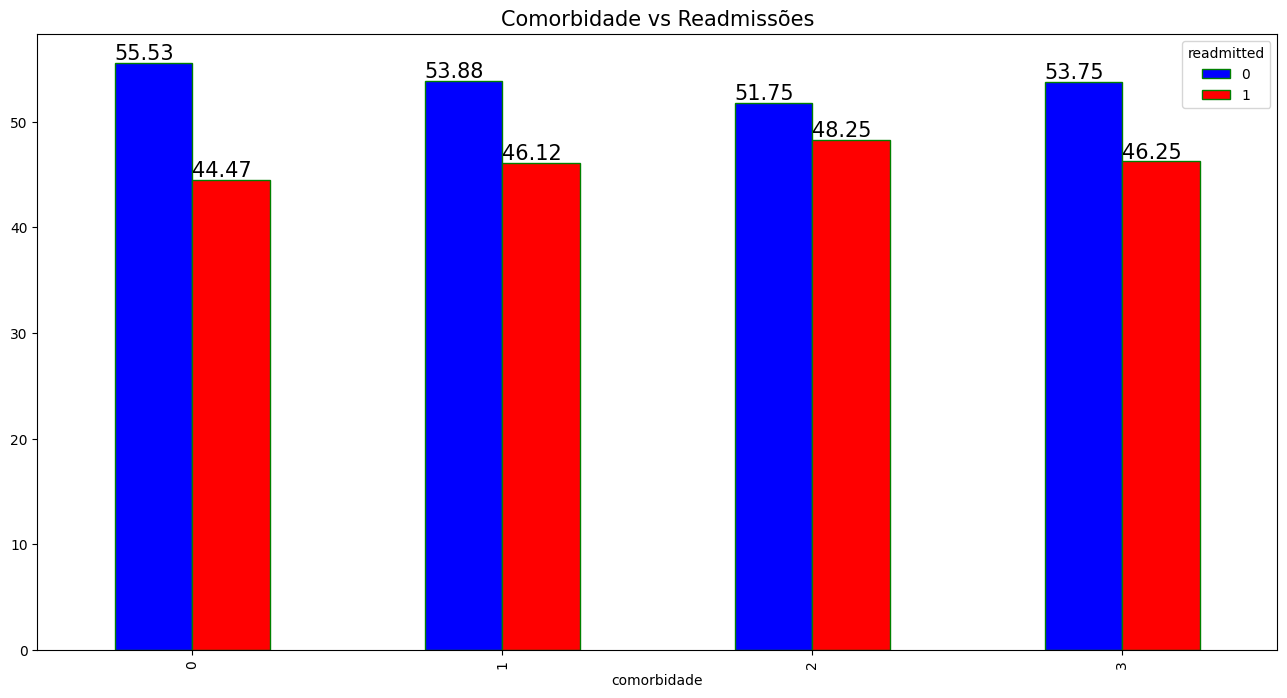

In [ ]:
# Plot

# Prepara a figura a partir dos dados
fig = percent_com.plot(kind = 'bar',
                       figsize = (16, 8),
                       width = 0.5,
                       edgecolor = 'g',
                       color = ['b','r'])

# Desenha cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00,
             i.get_height() + 0.3,
             str(round((i.get_height()), 2)),
             fontsize = 15,
             color = 'black',
             rotation = 0)

# Título e Print
plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

In [ ]:
# Valor 0 indica que:
# Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

# Valor 1 indica que:
# Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 2 indica que:
# Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 3 indica que:
# Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de
# forma simultânea no paciente

### **Variáveis de Dosagem de Medicamentos e Agrupamento de Variáveis**

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1,3


> O conjunto de dados contém 23 recursos para 23 medicamentos que indicam, para cada um deles, se uma alteração no medicamento foi feita ou não durante a atual internação do paciente.

Text(0, 0.5, 'Count')

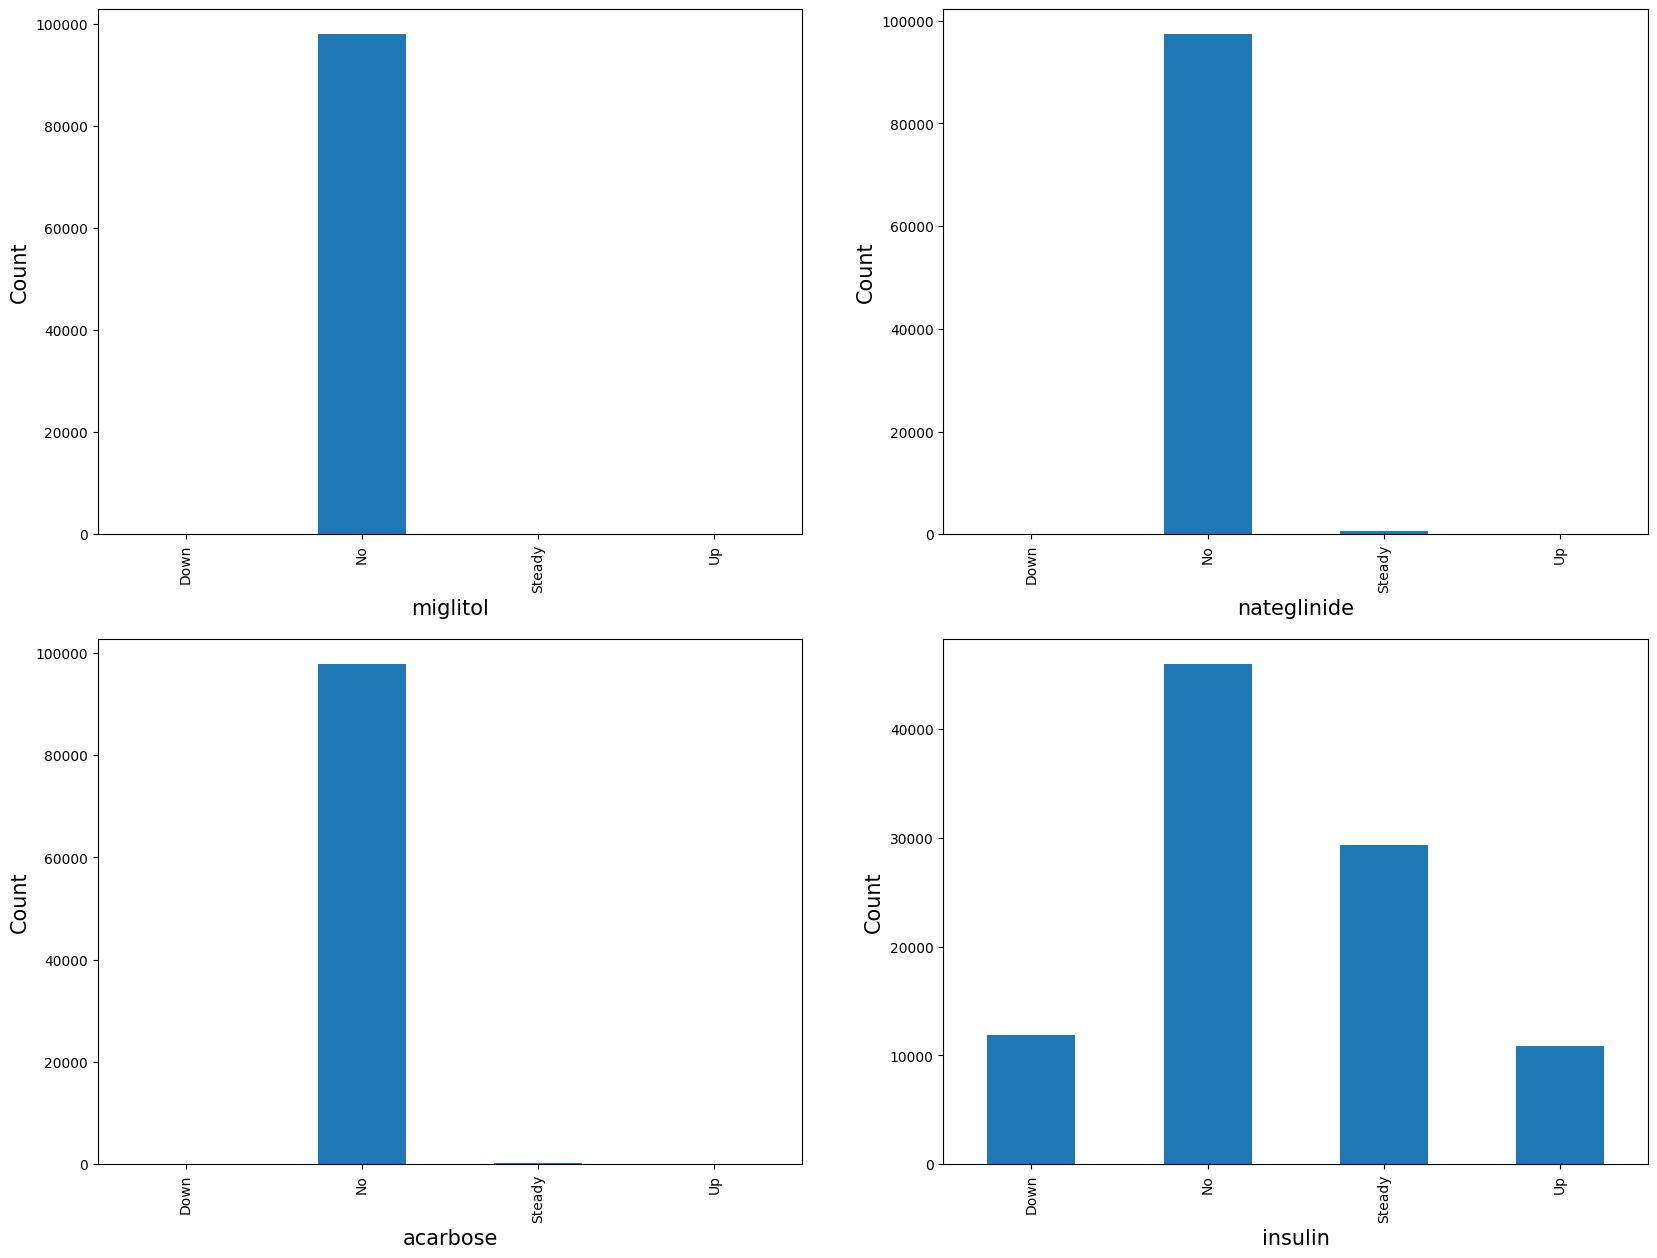

In [ ]:
# Plot
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Podemos contar quantas alterações foram feitas no total para cada paciente e criamos um novo atributo. Isso pode ajudar a descobrir uma relação com o número de alterações, independentemente de qual medicamento foi alterado.

Além disso, podemos criar um novo atributo indicando o total de medicamentos que cada paciente consumiu durante a internação. E então avaliamos se há relação do total com a readmissão.

In [ ]:
dados.shape

(98052, 42)

In [ ]:
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [ ]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [ ]:
# Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,metformintemp,repaglinidetemp,nateglinidetemp,chlorpropamidetemp,glimepiridetemp,acetohexamidetemp,glipizidetemp,glyburidetemp,tolbutamidetemp,pioglitazonetemp,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Cria uma variável para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

In [ ]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [ ]:
# Verifica o total por modificações na dosagem de medicamentos
dados.num_alt_dosagem_med.value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

Vamos alterar o valor das colunas dos medicamentos para refletir se esse medicamento está sendo administrado a um paciente ou não.

In [ ]:
# Recoding das colunas de medicamentos
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1)

Agora, criamos mais uma coluna para refletir quantos medicamentos estão sendo administrados a um paciente.

In [ ]:
# Variável com a contagem de medicamentos por paciente
dados['num_med'] = 0

In [ ]:
# Carregamos a nova variável
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [ ]:
# Verifica o total de medicamentos
dados['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

In [ ]:
# Remove as colunas de medicamentos
dados = dados.drop(columns = medicamentos)

In [ ]:
dados.shape

(98052, 24)

In [ ]:
dados.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                   int64
comorbidade                  int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

### **Recoding de variáveis categóricas**

Vamos fazer o recoding de algumas variáveis categóricas.

In [ ]:
dados.change.value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [ ]:
dados.gender.value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [ ]:
# Recoding de variáveis categóricas binárias
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,0,1,1,3,0,1


In [ ]:
dados.A1Cresult.value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [ ]:
dados.max_glu_serum.value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [ ]:
# Recoding de variáveis categóricas (label encoding)
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

Alguns pacientes no conjunto de dados tiveram mais de um encontro (consulta).

Não podemos contá-los como encontros independentes, porque isso influencia os resultados para aqueles pacientes que tiveram vários encontros. Assim, tentamos várias técnicas para recolher e consolidar vários encontros para o mesmo paciente, como:

- Considerar a permanência média no hospital em vários encontros.
- Considerar a porcentagem de alterações na medicação em vários encontros.
- Considerar o número total de encontros para substituir o ID exclusivo do encontro.
- Considerar a combinação de diagnósticos em vários encontros como uma lista.

Por fim, o ideal foi deixar apenas um registro de encontro para cada paciente e optamos por manter o primeiro.

In [ ]:
# Removendo duplicidades por id de paciente, mantendo o primeiro registro
dados = dados.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [ ]:
dados.shape

(68629, 24)

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,-99,-99,0,1,1,3,0,1


In [ ]:
dados.to_csv('dados_parte1.csv', index=False)

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados = pd.read_csv("dados_parte1.csv")

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,-99,-99,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,-99,-99,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,-99,-99,0,1,1,3,0,1


In [ ]:
dados.shape

(68629, 24)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

# Análise explorátoria


#### 1- Total de Medicamentos Consumidos Por Faixa Etária

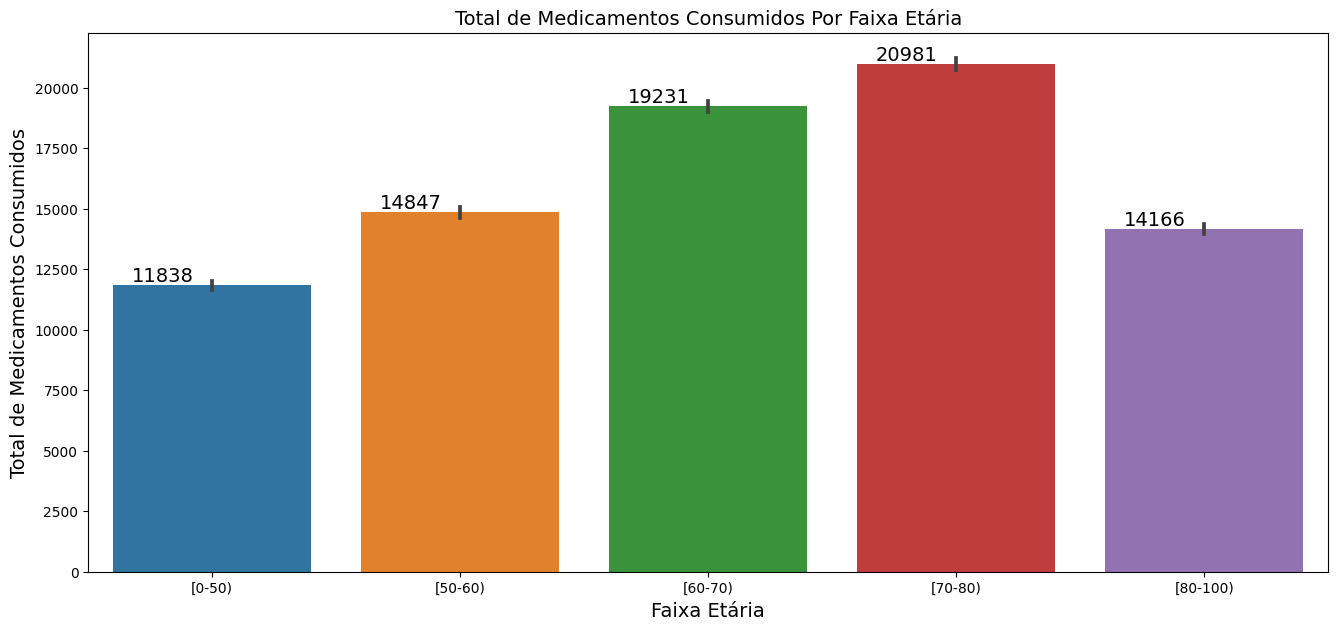

In [ ]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

# Título
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

#### 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

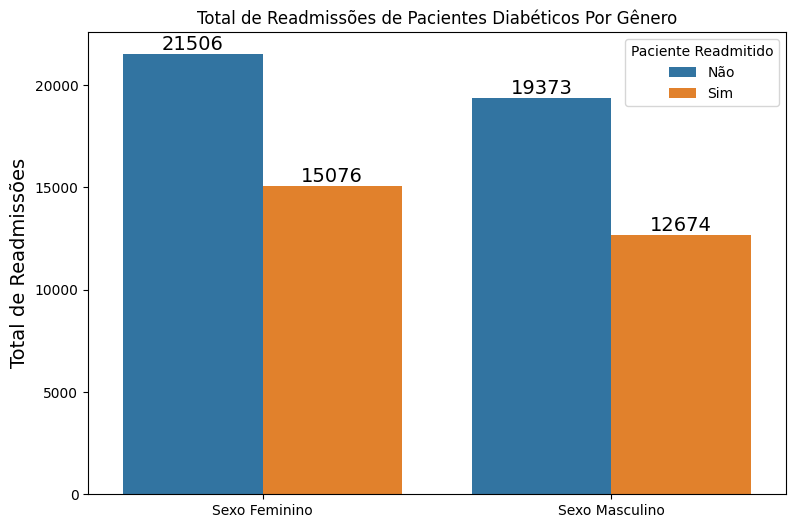

In [108]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']],
                     hue = 'readmitted',
                     data = dados)

# Tamanho da figura em polegadas
figx.figure.set_size_inches(9,6)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

#### 3- Total de Readmissões de Pacientes Por Faixa Etária

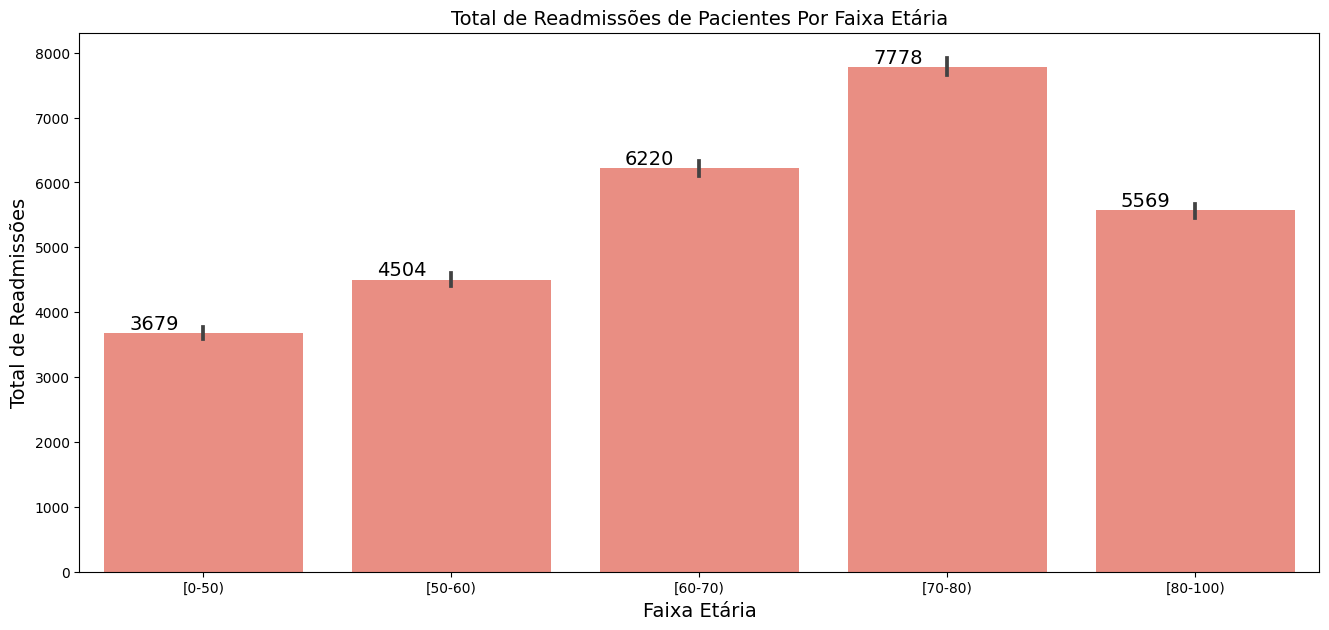

In [109]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

In [110]:
dados['readmitted'].value_counts()

0    40879
1    27750
Name: readmitted, dtype: int64

> A faixa etária de pacientes entre 70-80 é a que tem o maior número de readmissões.

#### 4- Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

In [112]:
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


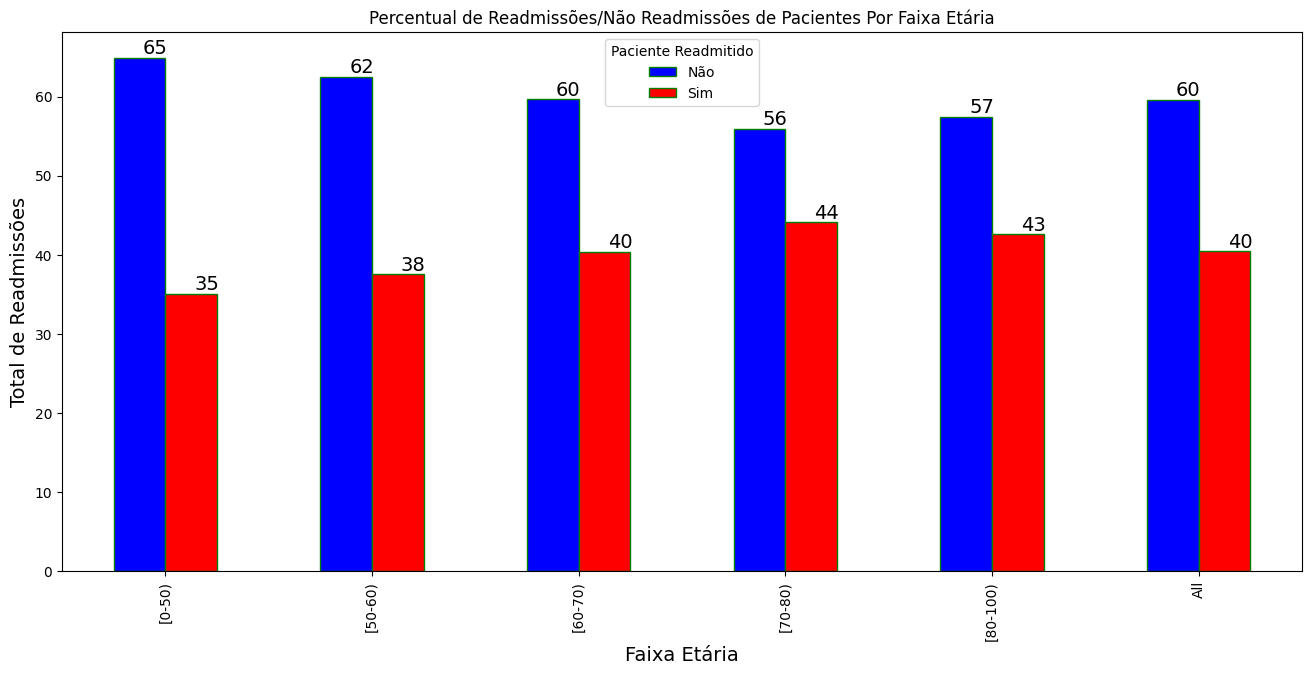

In [113]:
# Cria o gráfico
# Observe que chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = percentual_idade_readmissao.plot(kind = 'bar',
                                       figsize = (16, 7),
                                       width = 0.5,
                                       edgecolor = 'g',
                                       color = ['b', 'r'])

# Legenda
plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária", fontsize = 12)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

# Mostra o gráfico
plt.show()

> A faixa etária de pacientes entre 70-80 tem o maior percentual de readmissões, enquanto a faixa etária de 0-50 anos tem o menor percentual.

#### 5- Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

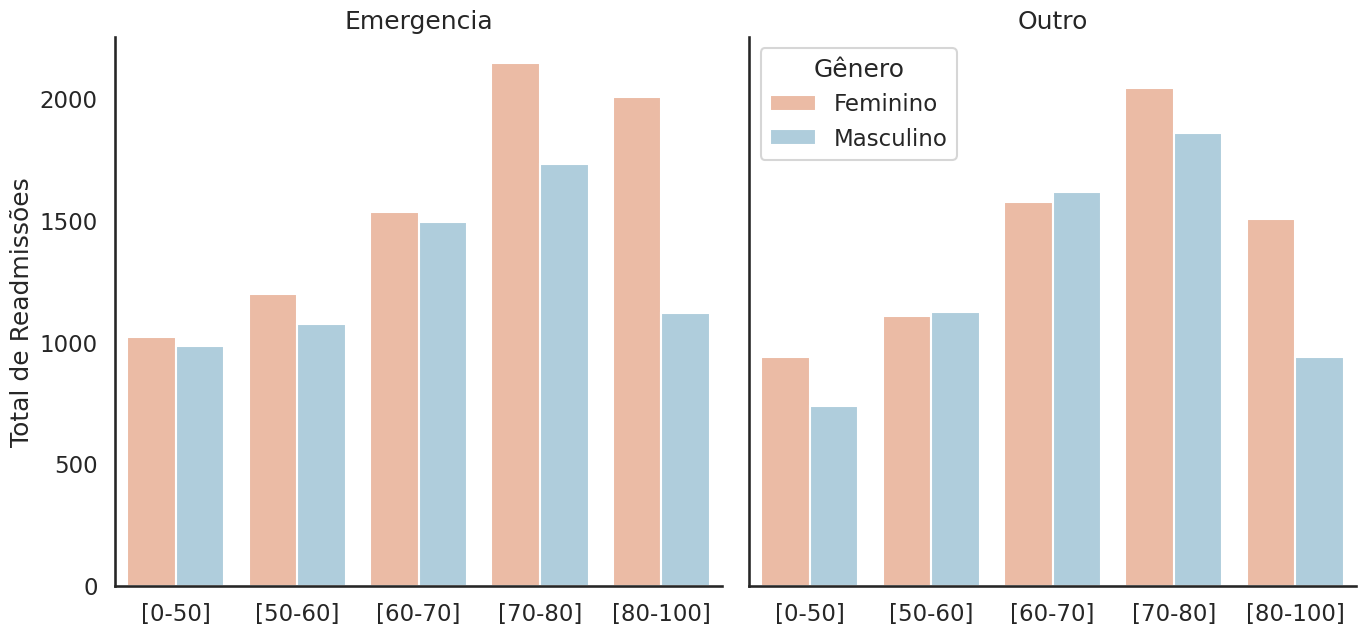

In [114]:
# Vamos incluir o background
sns.set(style = "white", context = "talk")

# Criação do gráfico de barras com catplot
# https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
g = sns.catplot(x = 'age',
                y = 'readmitted',
                hue = 'gender',
                col = 'admission_type_id',
                estimator = np.sum,
                data = dados,
                palette = "RdBu",
                kind = "bar",
                height = 7,
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

# Mostra o gráfico
plt.show(g)

> Mulheres na faixa etária de 70-80 anos tem um número maior de readmissões por emergência.

####  6- Total de Readmissões/Não Readmissões Por Gênero e Por Raça

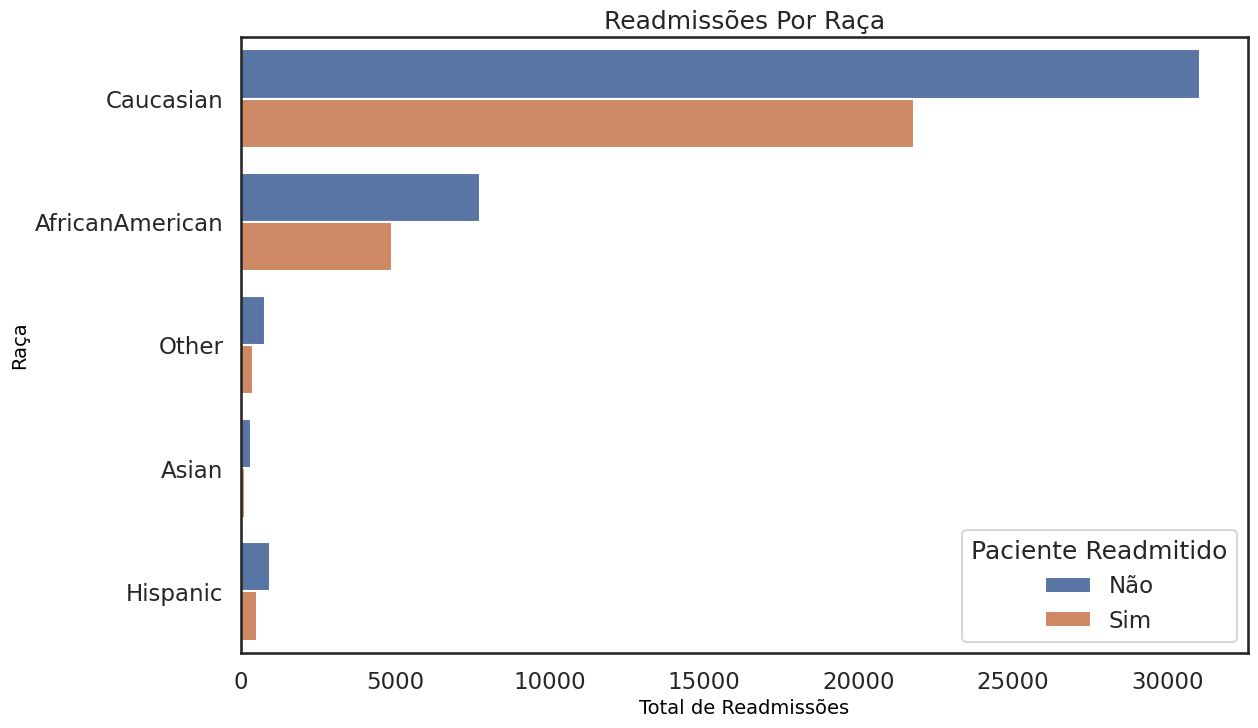

In [115]:
# Cria o gráfico
# Para o gráfico de barras horizontal, basta trocar a letra x por y na função
# https://seaborn.pydata.org/generated/seaborn.countplot.html
figx = sns.countplot(y = 'race', hue = 'readmitted', data = dados)

# Label do eixo x
plt.xlabel("Total de Readmissões", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Raça", fontsize = 14, color = 'black')

# Tamanho do gráfico
figx.figure.set_size_inches(13, 8)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Título
figx.axes.set_title('Readmissões Por Raça')

# Mostra o gráfico
plt.show()

# Sem os totais em cada barra os gráfico fica mais clean!

In [116]:
# Valores únicos de raça
dados['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [117]:
# Cria um dataframe temporário para ajustar o label da variável target para o plot
df_temp = dados

In [118]:
# Faz o mapeamento de 0 e 1 para labels
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

In [119]:
df_temp['readmitted'].head(10)

0        Readmitido
1    Não Readmitido
2    Não Readmitido
3    Não Readmitido
4        Readmitido
5    Não Readmitido
6        Readmitido
7    Não Readmitido
8    Não Readmitido
9        Readmitido
Name: readmitted, dtype: object

In [120]:
df_temp.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,-99,-99,1,1,Readmitido,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,-99,-99,0,1,Não Readmitido,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,-99,-99,1,1,Não Readmitido,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,-99,-99,1,1,Não Readmitido,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,-99,-99,0,1,Readmitido,3,0,1
5,55842,84259809,Caucasian,1,[60-70),Outro,Casa,Outro,4,70,1,21,0,0,0,7,-99,-99,1,1,Não Readmitido,2,0,3
6,63768,114882984,Caucasian,1,[70-80),Emergencia,Casa,Sala_Emergencia,5,73,0,12,0,0,0,8,-99,-99,0,1,Readmitido,3,0,1
7,12522,48330783,Caucasian,0,[80-100),Outro,Casa,Outro,13,68,2,28,0,0,0,8,-99,-99,1,1,Não Readmitido,2,0,2
8,15738,63555939,Caucasian,0,[80-100),Outro,Outro,Outro,12,33,3,18,0,0,0,8,-99,-99,1,1,Não Readmitido,2,0,2
9,28236,89869032,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,9,47,2,17,0,0,0,9,-99,-99,0,1,Readmitido,3,0,1


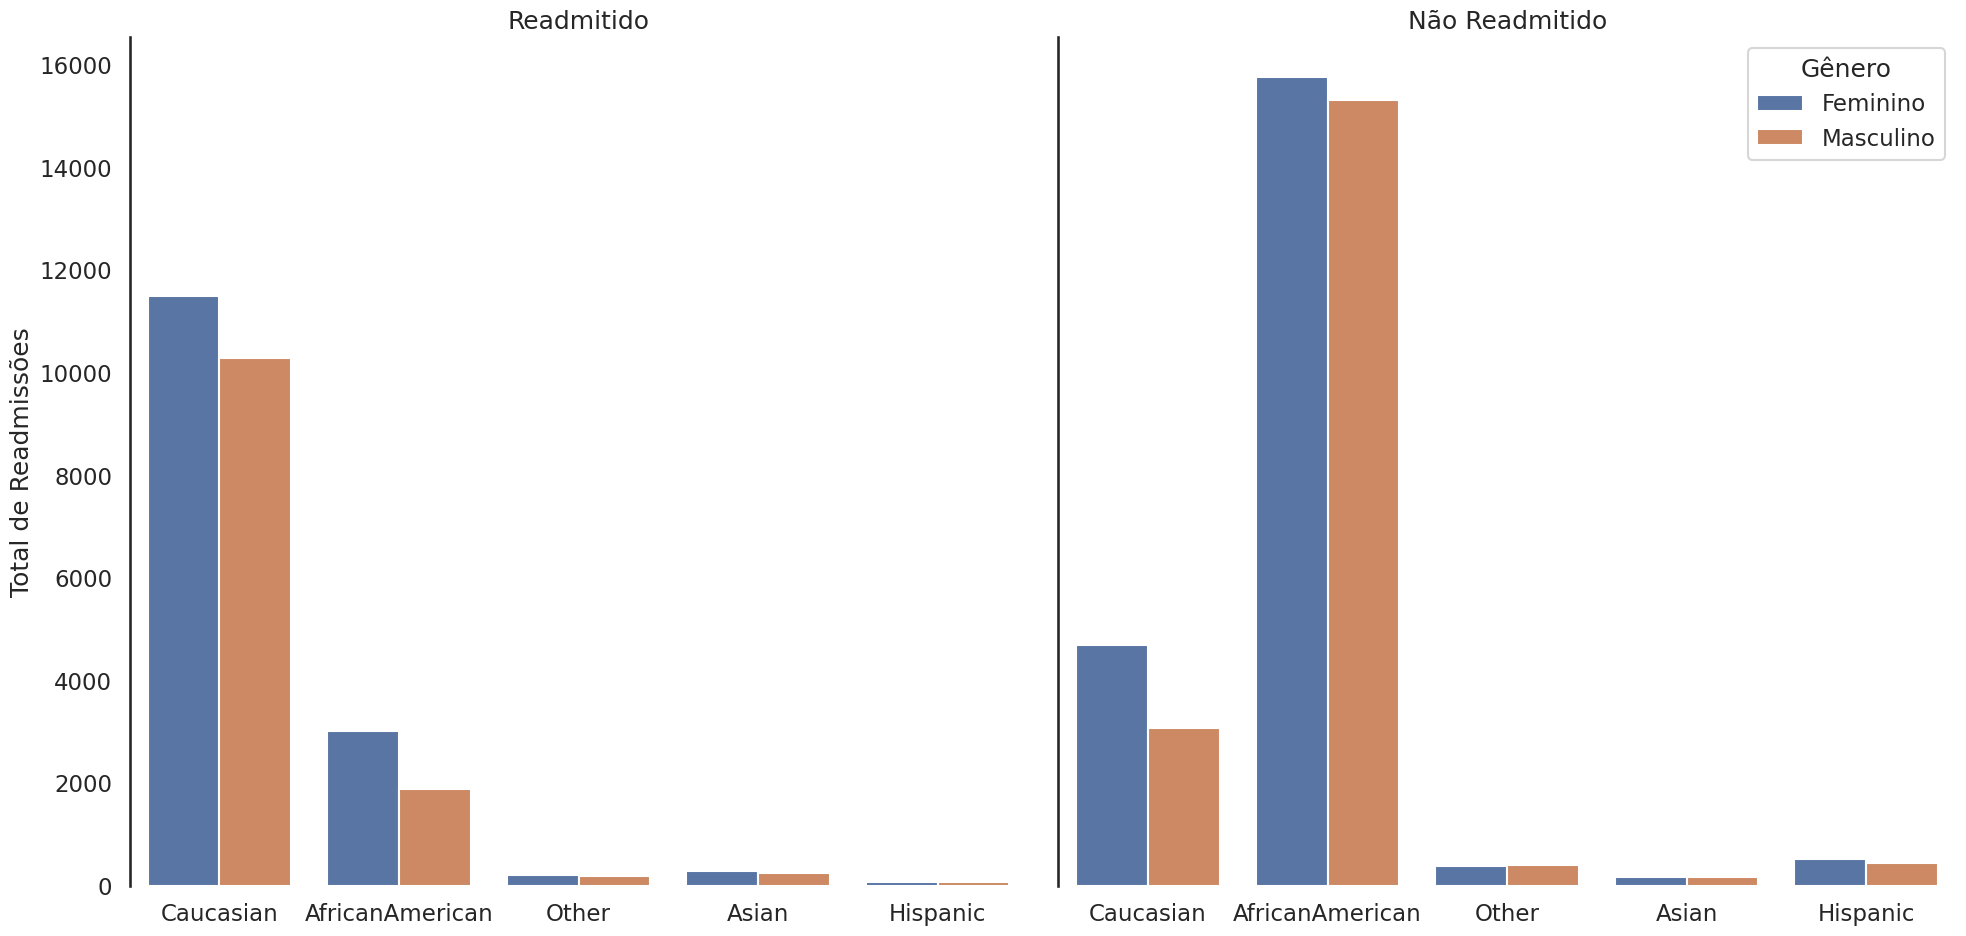

In [121]:
# Remove o background
sns.set(style = "white", context = "talk")

# Cria uma função para personalizar a quantidade de parâmetros
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facetgrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# Labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

> Mulheres Caucasianas são a maioria entre as mulheres readmitidas.

#### 7- Número de Visitas x Comorbidade

In [122]:
# Criamos a tabela de contigência
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

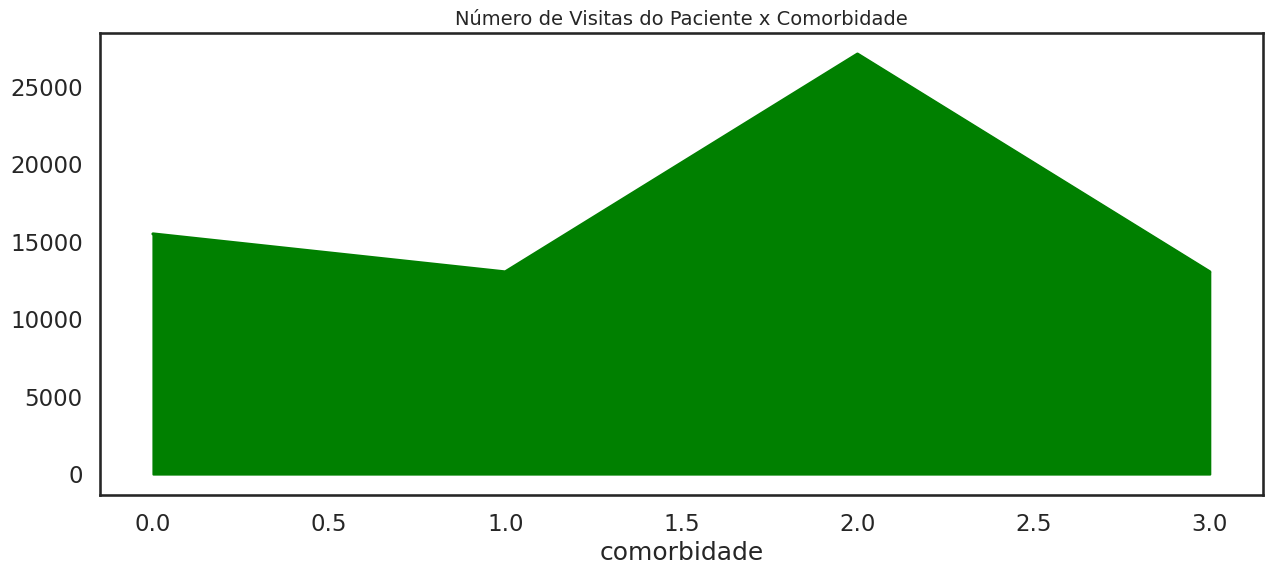

In [123]:
# Cria o gráfico
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html
fig = num_visitas_comorbidade.plot(kind = 'area',
                                   figsize = (15,6),
                                   color = 'Green')

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

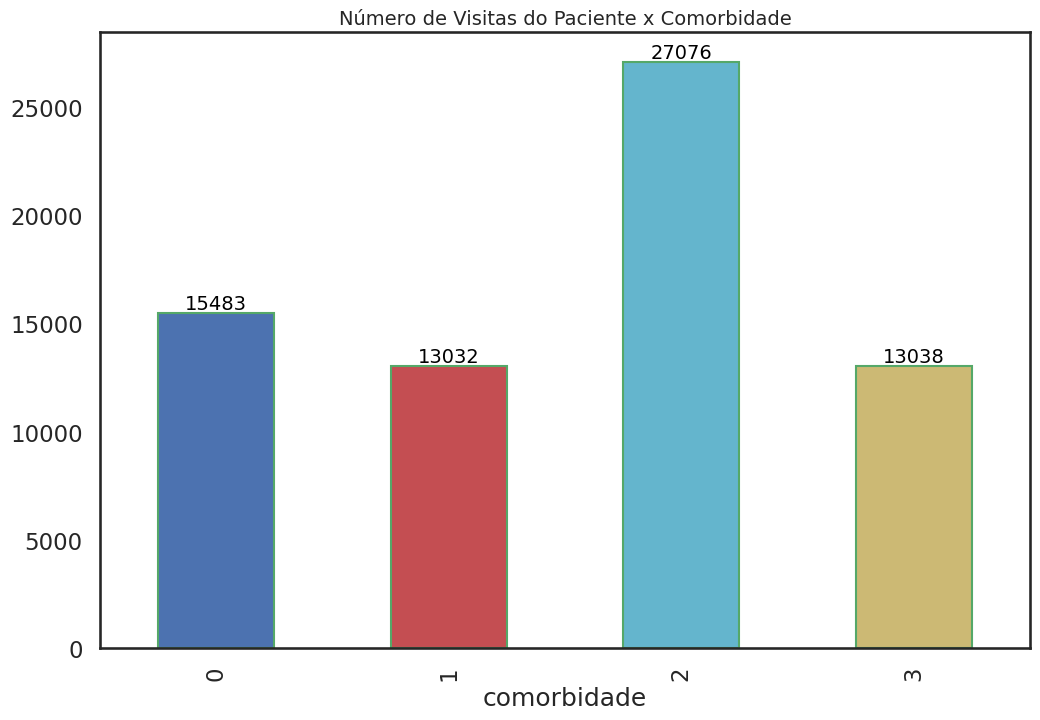

In [124]:
# Vamos remover as linhas do background
sns.set(style = "white", context = "talk")

# Cria o gráfico
fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8),
                                   width = 0.5,
                                   edgecolor = 'g',
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.25, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)

# Mostra o gráfico
plt.show()

>Pacientes com comorbidade tem o maior número de visitas.

#### 8- Proporção de Readmissões Pelo Número de Visitas Antes da Alta

In [125]:
# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


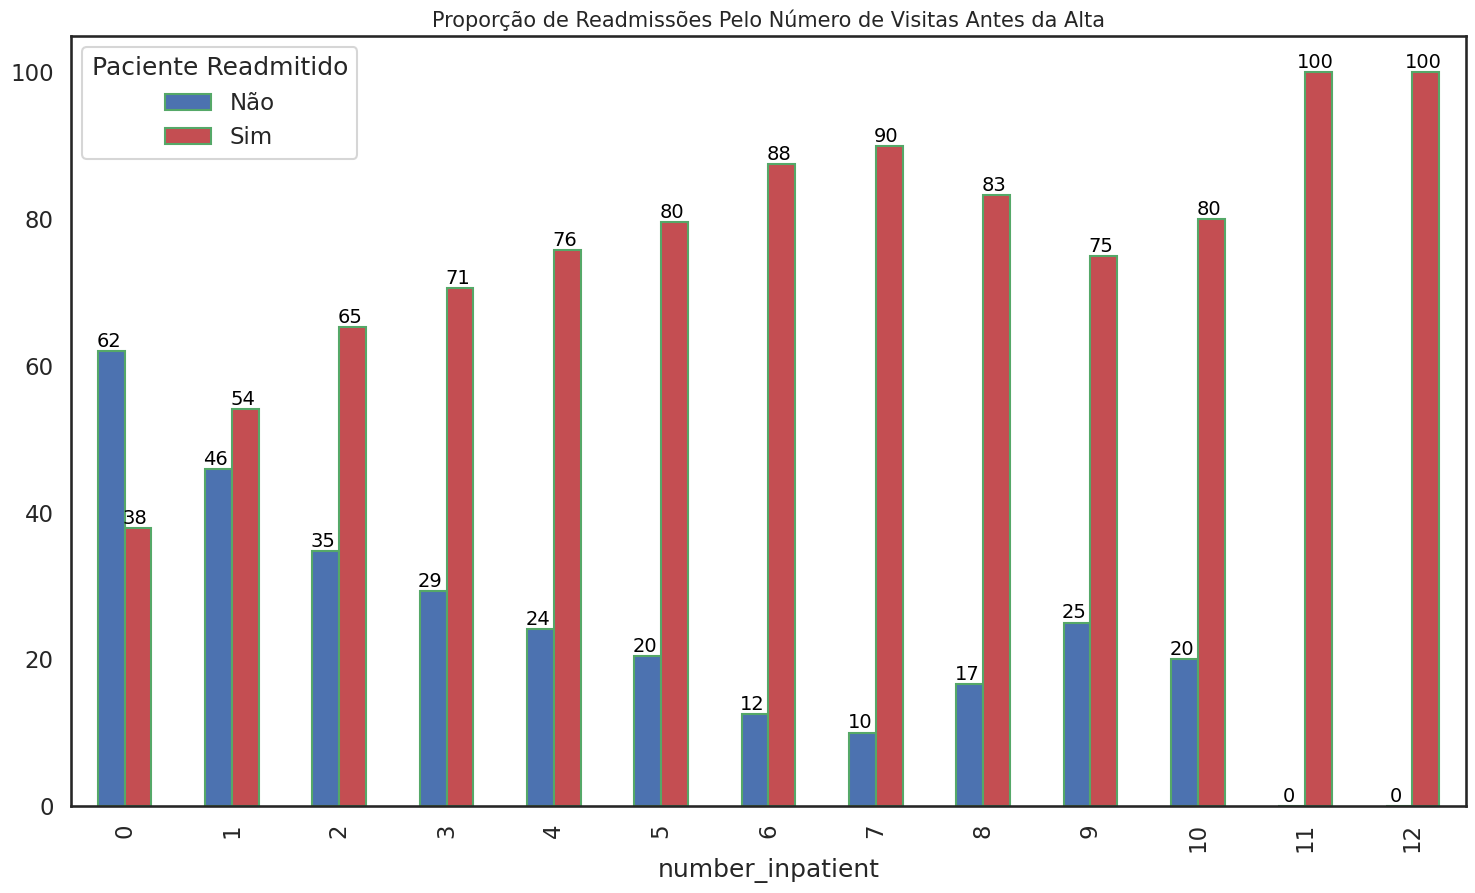

In [126]:
# Cria o gráfico
fig = percent_visitas_readm.plot(kind = 'bar', figsize = (18,10), width = 0.5, edgecolor = 'g', color = ['b','r'])

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.1, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

# Legenda
fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Mostra o gráfico
plt.show()

> Quanto mais visitas o paciente recebeu antes da alta, maior foi o volume de readmissões. Ou seja, quanto mais visitas o paciente recebe, maiores as chances de readmissão.

#### 9- Gráficos Estatísticos

<Axes: xlabel='Número de Medicamentos Consumidos', ylabel='Density'>

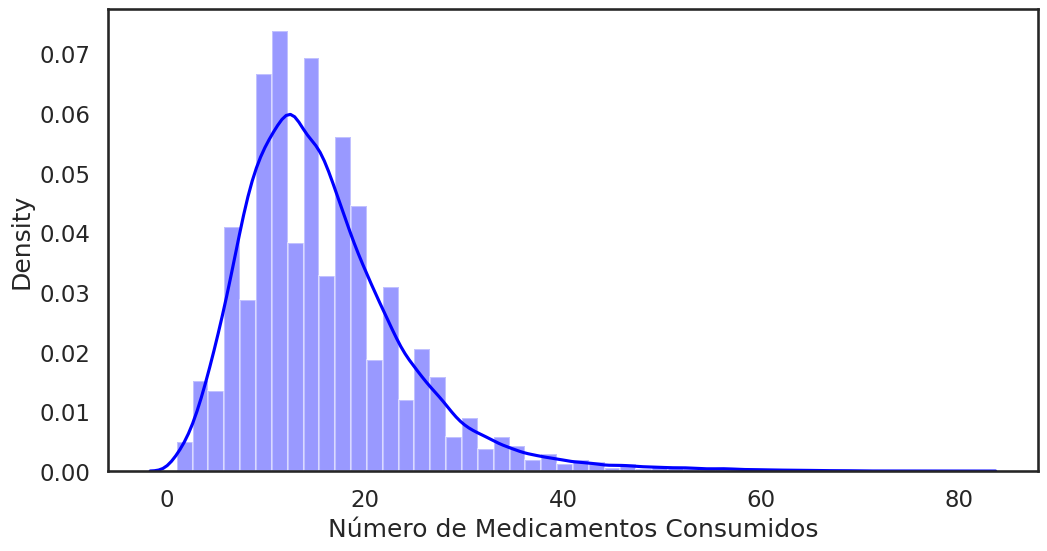

In [127]:
# Tamanho da figura
plt.figure(figsize = (12,6))

# Cria o gráfico
sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")

In [128]:
# Estatísticas
dados['num_medications'].describe()

count    68629.000000
mean        15.806481
std          8.289790
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

<Axes: xlabel='num_medications'>

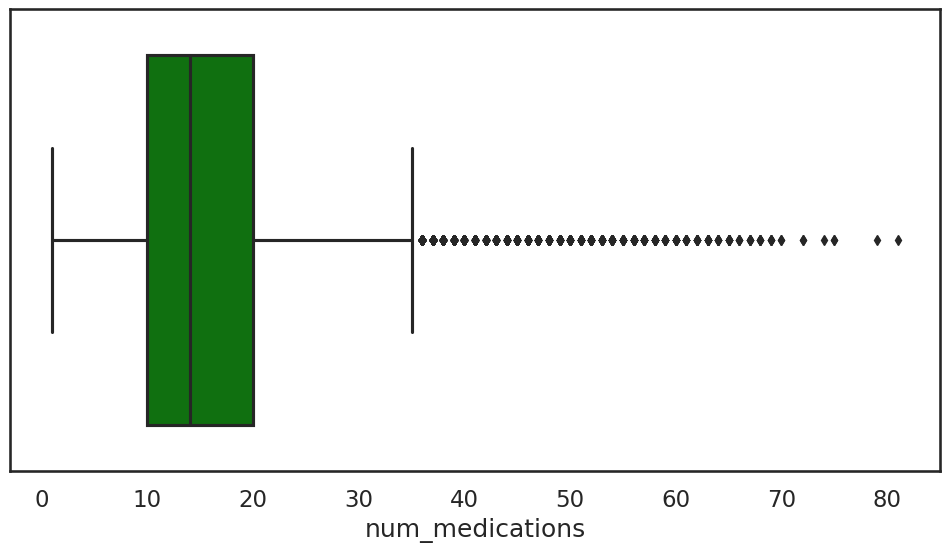

In [131]:
# Tamanho da figura
plt.figure(figsize = (12,6))

# Cria o gráfico
sns.boxplot(x = dados['num_medications'], color = 'Green')


#### Stacked Histogramas

<Axes: ylabel='Frequency'>

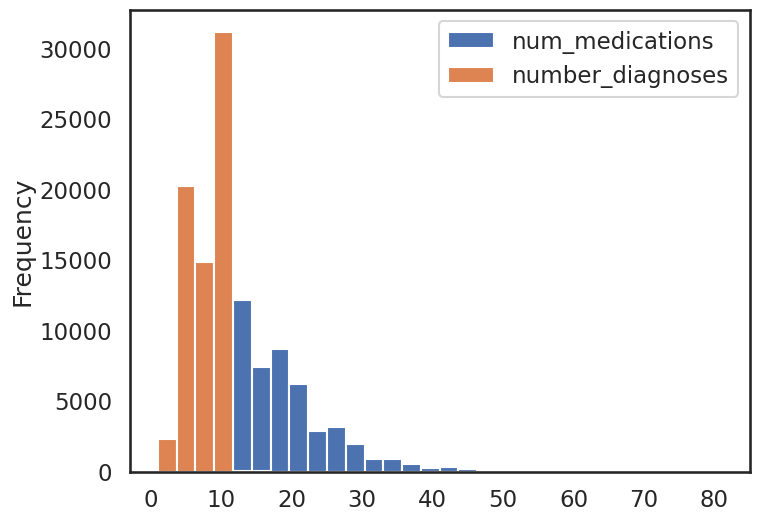

In [132]:
# Dois histogramas para duas variáveis no mesmo gráfico
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (8,6))

#### Histogramas da Mesma Variável Por Diferentes Classes

array([<Axes: title={'center': 'Não Readmitido'}>,
       <Axes: title={'center': 'Readmitido'}>], dtype=object)

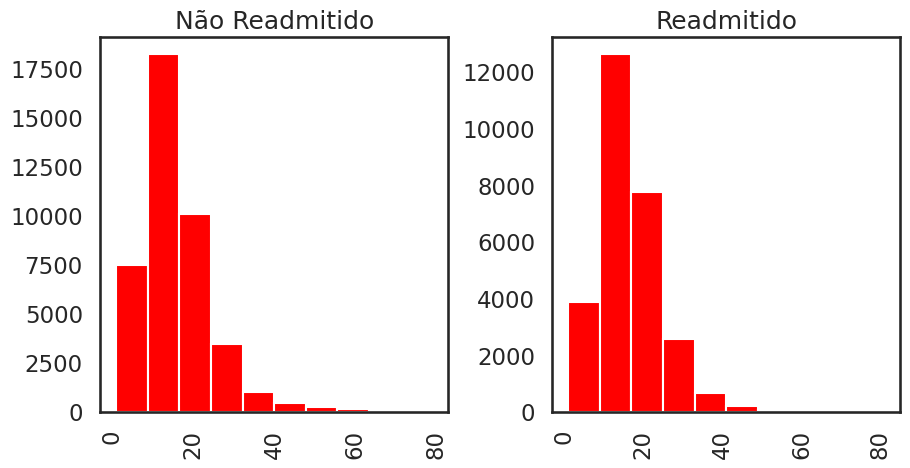

In [133]:
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Red')

#### Comportamento do Paciente Por Procedimentos Clínicos

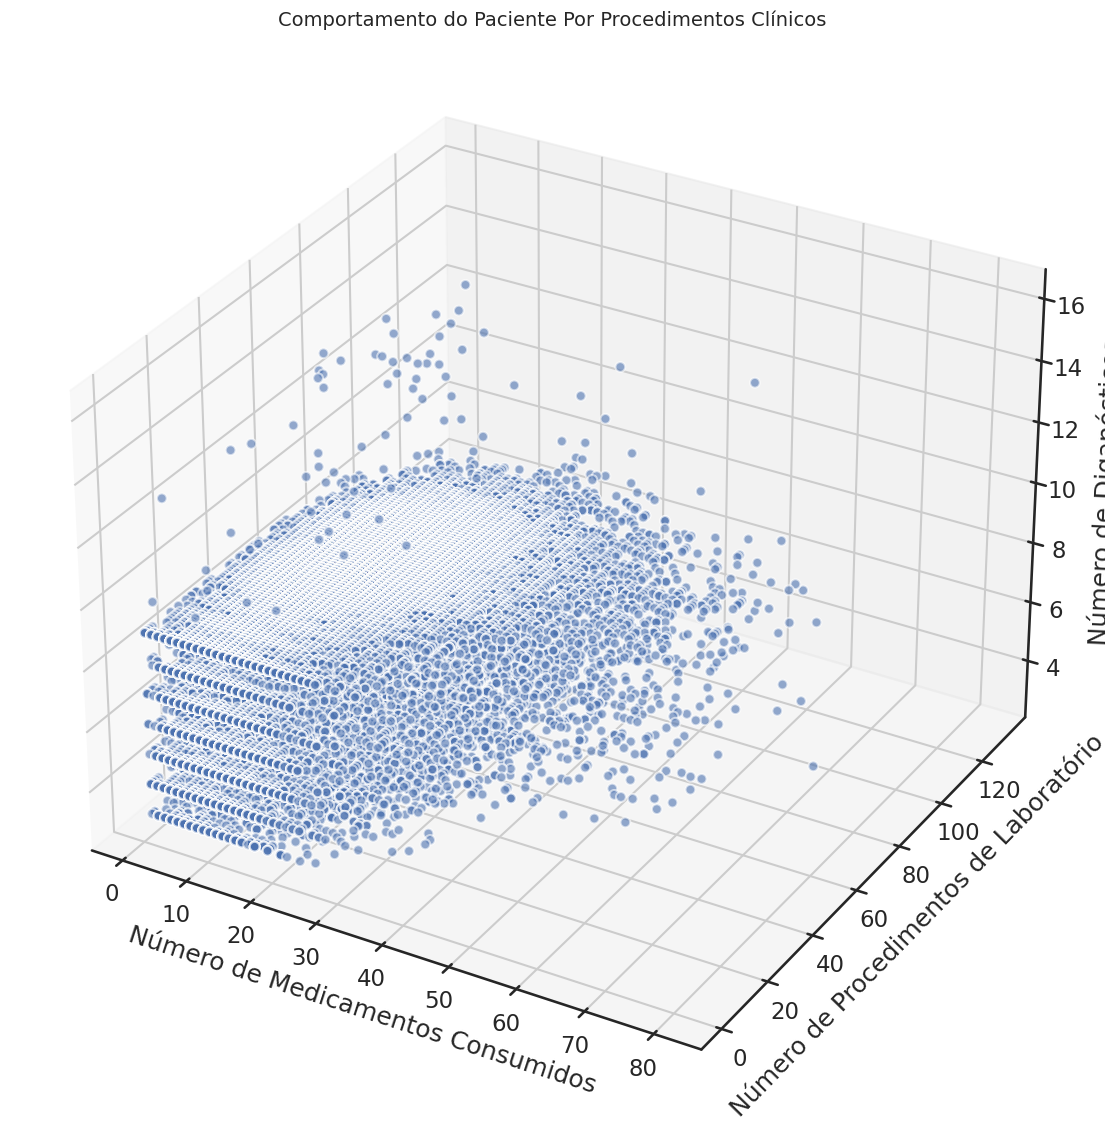

In [135]:
# Projeção 3D

# Tamanho da figura
fig = plt.figure(figsize = (14, 15))

# Subplots
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = dados['num_medications']
ys = dados['num_lab_procedures']
zs = dados['number_diagnoses']

# Gráfico de pontos
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

# Labels
ax.set_xlabel('\nNúmero de Medicamentos Consumidos')
ax.set_ylabel('\nNúmero de Procedimentos de Laboratório')
ax.set_zlabel('\nNúmero de Diganósticos')

# Título
plt.title("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 14)

# Mostra o gráfico
plt.show()

# Relatório:
